In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [3]:
df_hongos = pd.read_csv("/content/drive/MyDrive/datosTP2/files/MushroomDataset/secondary_data.csv", delimiter=";")

Me quedo con 80% de los datos para train, 10% para validation y 10% para test. \\
Los separo al azar para obtener datos que representen bien todo el conjunto.

In [4]:
y = df_hongos["class"]
X = df_hongos.drop("class", axis = 1)
tamanio_test = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tamanio_test, random_state=9)

In [5]:
tamanio_validation = 0.1 / (1 - tamanio_test)

In [6]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=tamanio_validation, random_state=9)

##**Imputación de nulos**

In [7]:
df_hongos.nunique()

class                      2
cap-diameter            2571
cap-shape                  7
cap-surface               11
cap-color                 12
does-bruise-or-bleed       2
gill-attachment            7
gill-spacing               3
gill-color                12
stem-height             2226
stem-width              4630
stem-root                  5
stem-surface               8
stem-color                13
veil-type                  1
veil-color                 6
has-ring                   2
ring-type                  8
spore-print-color          7
habitat                    8
season                     4
dtype: int64

Veo cuantos nulos hay por columna

In [8]:
df_hongos.count()

class                   61069
cap-diameter            61069
cap-shape               61069
cap-surface             46949
cap-color               61069
does-bruise-or-bleed    61069
gill-attachment         51185
gill-spacing            36006
gill-color              61069
stem-height             61069
stem-width              61069
stem-root                9531
stem-surface            22945
stem-color              61069
veil-type                3177
veil-color               7413
has-ring                61069
ring-type               58598
spore-print-color        6354
habitat                 61069
season                  61069
dtype: int64

Según la descripción de los datos, sé que el valor "f" puede usarse tanto para nombrar un dato válido, como para definir un "None". En las columnas donde no sea un dato válido, los voy a reemplazar por "*" que es mi convención para los valores desconocidos.

In [9]:
columnas_con_variable_f = df_hongos.select_dtypes(include=["object"]).columns.map(lambda x: x if df_hongos[x].str.contains("f").any() else None).dropna() 
columnas_con_variable_f

Index(['cap-shape', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing',
       'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'has-ring',
       'ring-type'],
      dtype='object')

###**Nulos en columnas de gill-":**

In [10]:
columnas_gill =  ["gill-attachment", "gill-spacing", "gill-color"]

In [11]:
df_hongos.loc[ : , columnas_gill ]   

,gill-attachment,gill-spacing,gill-color
0,e,NaN,w
1,e,NaN,w
2,e,NaN,w
3,e,NaN,w
4,e,NaN,w
...,...,...,...
61064,f,f,f
61065,f,f,f
61066,f,f,f
61067,f,f,f


In [12]:
df_hongos.loc[ : , columnas_gill ].loc[ df_hongos["gill-attachment"] == "f"] 

,gill-attachment,gill-spacing,gill-color
54362,f,f,f
54363,f,f,f
54364,f,f,f
54365,f,f,f
54366,f,f,f
...,...,...,...
61064,f,f,f
61065,f,f,f
61066,f,f,f
61067,f,f,f


In [13]:
df_hongos.loc[ : , columnas_gill ].loc[ df_hongos["gill-attachment"] == "f"].nunique() 

gill-attachment    1
gill-spacing       1
gill-color         1
dtype: int64

In [14]:
df_hongos.loc[ : , columnas_gill ].loc[ df_hongos["gill-spacing"] == "f"].nunique() 

gill-attachment    1
gill-spacing       1
gill-color         1
dtype: int64

In [15]:
df_hongos.loc[ : , columnas_gill ].loc[ df_hongos["gill-color"] == "f"].nunique() 

gill-attachment    1
gill-spacing       1
gill-color         1
dtype: int64

En lo anterior puedo ver que las columnas con gill son siempre "f" todas a la vez. Supongo así que el gill no es desconocido, sino que no lo tiene el hongo. \\
Entonces dejo esa variable "f" tal como está en esas columnas porque me da información.

###**Nulos en columnas de stem- :**

In [16]:
df_hongos["stem-height"].sort_values(ascending=True)

57818     0.00
56566     0.00
56565     0.00
56564     0.00
56563     0.00
         ...  
2881     32.85
2897     33.03
2937     33.25
3143     33.72
2870     33.92
Name: stem-height, Length: 61069, dtype: float64

In [17]:
df_hongos["stem-width"].sort_values(ascending=True)

57948      0.00
57845      0.00
57844      0.00
57843      0.00
57842      0.00
          ...  
48501     95.68
48447     98.00
48366    101.69
48682    102.48
48597    103.91
Name: stem-width, Length: 61069, dtype: float64

In [18]:
df_hongos.loc[ : , ["stem-root", "stem-surface", "stem-color"] ].loc[ df_hongos["stem-height"] == 0.00] 

,stem-root,stem-surface,stem-color
56480,f,f,f
56481,f,f,f
56482,f,f,f
56483,f,f,f
56484,f,f,f
...,...,...,...
58240,f,f,f
58241,f,f,f
58242,f,f,f
58243,f,f,f


In [19]:
df_hongos.loc[ : , ["stem-root", "stem-surface", "stem-color"] ].loc[ df_hongos["stem-width"] == 0.00] 

,stem-root,stem-surface,stem-color
56480,f,f,f
56481,f,f,f
56482,f,f,f
56483,f,f,f
56484,f,f,f
...,...,...,...
58240,f,f,f
58241,f,f,f
58242,f,f,f
58243,f,f,f


In [20]:
df_hongos.loc[ : , ["stem-root", "stem-surface", "stem-color"] ].loc[ (df_hongos["stem-height"] == 0.00) & (df_hongos["stem-width"] == 0.00)]

,stem-root,stem-surface,stem-color
56480,f,f,f
56481,f,f,f
56482,f,f,f
56483,f,f,f
56484,f,f,f
...,...,...,...
58240,f,f,f
58241,f,f,f
58242,f,f,f
58243,f,f,f


In [21]:
df_hongos.loc[ : , ["stem-root", "stem-surface", "stem-color"] ].loc[ (df_hongos["stem-height"] == 0.00) & (df_hongos["stem-width"] == 0.00)].nunique()

stem-root       1
stem-surface    1
stem-color      1
dtype: int64

In [22]:
df_hongos.loc[(df_hongos["stem-height"] == 0.00) & (df_hongos["stem-width"] == 0.00)].head(3)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
56480,p,2.48,o,t,n,f,NaN,c,w,0.0,...,f,f,f,NaN,NaN,f,f,n,d,u
56481,p,4.29,o,t,w,f,NaN,c,w,0.0,...,f,f,f,NaN,NaN,f,f,n,d,u
56482,p,4.29,o,t,n,f,NaN,c,w,0.0,...,f,f,f,NaN,NaN,f,f,n,d,u


Veo que cuando no tienen valor los tallos de los hongos, el valor es siempre "f", que lo supongo desconocido. \\
En el paper decía que secondary_data solo tenía hongos con tallo, por lo que voy a remplazar los valores de tallos inválidos por la media de la columna en todo el dataset, sabiendo que solo valen 0.00 los valores de altura y ancho del tallo para ambos a la vez.

In [23]:
promedio_alto_tallo_dataset = df_hongos["stem-height"].mean()
promedio_ancho_tallo_dataset = df_hongos["stem-width"].mean()


X_train["stem-height"] = X_train["stem-height"].replace(0.00, promedio_alto_tallo_dataset)
X_validation["stem-height"] = X_validation["stem-height"].replace(0.00, promedio_alto_tallo_dataset)
X_test["stem-height"] = X_test["stem-height"].replace(0.00, promedio_alto_tallo_dataset)

X_train["stem-width"] = X_train["stem-width"].replace(0.00, promedio_ancho_tallo_dataset)
X_validation["stem-width"] = X_validation["stem-width"].replace(0.00, promedio_ancho_tallo_dataset)
X_test["stem-width"] = X_test["stem-width"].replace(0.00, promedio_ancho_tallo_dataset)

###**Nulos en columna has-ring y ring-type:**

In [24]:
df_hongos["has-ring"].unique()

array(['t', 'f'], dtype=object)

In [25]:
df_hongos["ring-type"].loc[ df_hongos["has-ring"] == "f" ].unique()

array(['f'], dtype=object)

In [26]:
df_hongos["ring-type"].loc[ df_hongos["has-ring"] == "t" ].unique()

array(['g', 'p', 'e', 'l', 'm', nan, 'r', 'f', 'z'], dtype=object)

In [27]:
df_hongos["ring-type"].loc[ (df_hongos["has-ring"] == "t") & (df_hongos["ring-type"] == "f") ]

30005    f
30006    f
30007    f
30008    f
30009    f
        ..
59652    f
59653    f
59654    f
59655    f
59656    f
Name: ring-type, Length: 2471, dtype: object

Veo en lo anterior que el "f" de ring-type y has-ring lo puedo suponer como desconocido. Esto porque veo que no significa que no tenga anillo por ejemplo.

###**Nulos en columna veil-type:**

In [28]:
df_hongos["veil-type"].unique()

array(['u', nan], dtype=object)

Supongo que los NaN de "veil-type" son el otro valor posible ("p").

In [29]:
X_train["veil-type"] = X_train["veil-type"].fillna("p")
X_validation["veil-type"] = X_validation["veil-type"].fillna("p")
X_test["veil-type"] = X_test["veil-type"].fillna("p")

###**Asignación de constante a valores nan y "f" desconocidos:**

Remplazo todos los NaN restantes por *. Esto porque en el texto y en los gráficos no encontré nada para suponer otra cosa. \\
Uso * porque supongo que no lo van a pasar nunca como dato de una columna.



In [30]:
X_train = X_train.fillna("*")
X_validation = X_validation.fillna("*")
X_test = X_test.fillna("*")

También reemplazo todos los "f" que supongo desconocidos por el mismo "*" para tener una convención más uniforme para los desconocidos o nulos. \\
No uso "f" porque otras columnas lo usan con un significado real.

In [31]:
columnas_con_f_desconocidos = ["stem-root", "stem-surface", "stem-color", "has-ring", "ring-type"]


X_train[columnas_con_f_desconocidos] = X_train[columnas_con_f_desconocidos].replace("f", "*")
X_validation[columnas_con_f_desconocidos] = X_validation[columnas_con_f_desconocidos].replace("f", "*")
X_test[columnas_con_f_desconocidos] = X_test[columnas_con_f_desconocidos].replace("f", "*")

##**Encoding:**

In [32]:
columnas_categoricas = df_hongos.select_dtypes(include=["object"]).columns.drop("class")

In [33]:
one_hot_encoder = OneHotEncoder(sparse_output=False, drop="if_binary", dtype=int)

X_train_encoded = one_hot_encoder.fit_transform( X_train[columnas_categoricas] )
X_validation_encoded = one_hot_encoder.transform( X_validation[columnas_categoricas] )
X_test_encoded = one_hot_encoder.transform( X_test[columnas_categoricas] )

In [34]:
nombres_features = one_hot_encoder.get_feature_names_out(columnas_categoricas)

columnas_numericas = X_train[["cap-diameter", "stem-height", "stem-width"]].reset_index(drop=True)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=nombres_features)
X_train_encoded = pd.concat([X_train_encoded, columnas_numericas], axis=1)

columnas_numericas = X_validation[["cap-diameter", "stem-height", "stem-width"]].reset_index(drop=True)
X_validation_encoded = pd.DataFrame(X_validation_encoded, columns=nombres_features)
X_validation_encoded = pd.concat([X_validation_encoded, columnas_numericas], axis=1)

columnas_numericas = X_test[["cap-diameter", "stem-height", "stem-width"]].reset_index(drop=True)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=nombres_features)
X_test_encoded = pd.concat([X_test_encoded, columnas_numericas], axis=1)

In [35]:
y_train_encoded = y_train.map(lambda x: 0 if x == 'e' else 1)
y_validation_encoded = y_validation.map(lambda x: 0 if x == 'e' else 1)
y_test_encoded = y_test.map(lambda x: 0 if x == 'e' else 1)

##**Random Forest:**

In [36]:
random_forest = RandomForestClassifier(random_state=9)

In [37]:
random_forest.fit(X_train_encoded, y_train_encoded)

RandomForestClassifier(random_state=9)

In [38]:
from sklearn.metrics import roc_auc_score

Veo que no fue necesario buscar hiperparámetros ya que con los default se llega a un auc-roc de 1.0. \\
Pero se mostró en la parte 2 del Baseline como sería buscar hiperparámetros.

In [39]:
roc_auc_score(y_validation_encoded, random_forest.predict_proba(X_validation_encoded)[:, 1])

1.0

Finalmente:

In [40]:
roc_auc_score(y_test_encoded, random_forest.predict_proba(X_test_encoded)[:, 1])

1.0

##**Punto extra gráfico features:**

In [41]:
importancias_features = abs(random_forest.feature_importances_).flatten()

In [42]:
features_con_importancias = {}

for i, columna in enumerate(X_train_encoded.columns):
  features_con_importancias[columna] = importancias_features[i]

In [43]:
df_features_especificos_por_importancia = pd.DataFrame( index=features_con_importancias.keys(), columns=["importancia_feature"], data=features_con_importancias.values() )

In [44]:
df_features_especificos_por_importancia = df_features_especificos_por_importancia.sort_values(by="importancia_feature", ascending=True)

Text(0.5, 1.0, 'Top 15 features específicas más importantes')

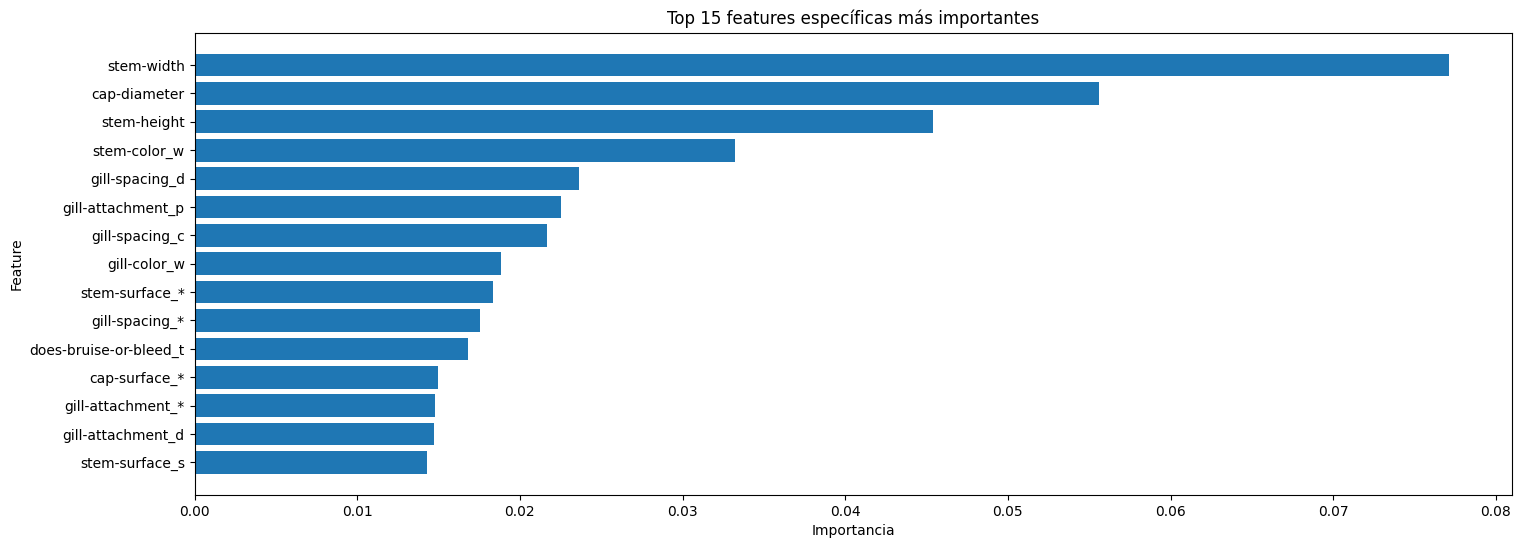

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots( figsize=(17,6) )

top_15 = df_features_especificos_por_importancia.iloc[ -15: ]

plt.barh(y=top_15.index, width=top_15["importancia_feature"])

plt.xlabel("Importancia")
plt.ylabel("Feature")
plt.title("Top 15 features específicas más importantes")

In [46]:
df_features_generales_por_importancia = df_features_especificos_por_importancia.copy()
df_features_generales_por_importancia.index = df_features_especificos_por_importancia.index.map(lambda x: x.split("_")[0])
columnas_por_importancia = df_features_generales_por_importancia.groupby(df_features_generales_por_importancia.index).sum().sort_values(by="importancia_feature", ascending=True)

Text(0.5, 1.0, 'Features en general más influyentes para saber si un hongo es venenoso o comestible')

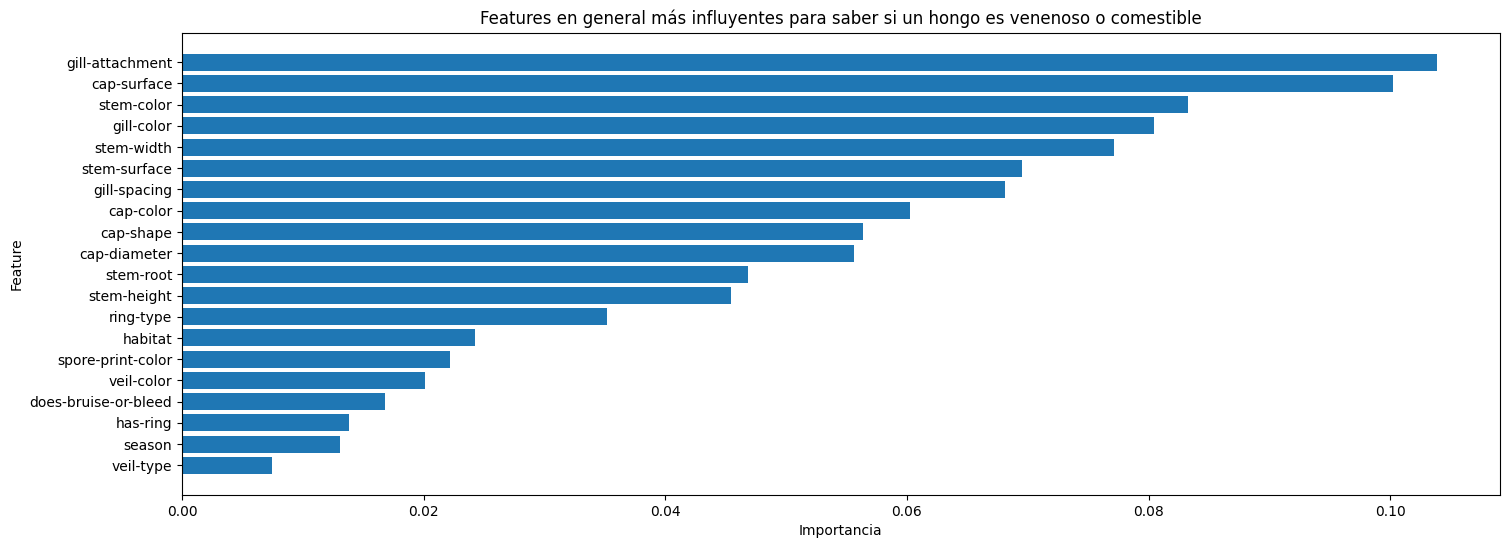

In [47]:
fig, ax = plt.subplots( figsize=(17,6) )

plt.barh(y=columnas_por_importancia.index, width=columnas_por_importancia["importancia_feature"])

plt.xlabel("Importancia")
plt.ylabel("Feature")
plt.title("Features en general más influyentes para saber si un hongo es venenoso o comestible")

**Graficar la importancia de features para el Random Forest de la parte III. ¿Qué tanto se parece a los features importantes de la parte II?** \\
No se parecen en mucho, varias de las más importantes para la Logistic Regression son de las menos importantes para el RF y viceversa. Solo algunas son bastante importantes para ambos como "stem-color" por ejemplo, de las características en general. Para las features más específicas es menos parecido todavía.